In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import gdown
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

In [ ]:
def DFA(x,y):
  n1 = McCulloch_Pitts_neuron([2,-1], 2)
  n2 = McCulloch_Pitts_neuron([-2,-1], -6)
  n3 = McCulloch_Pitts_neuron([0,1], 0)
  n4 = McCulloch_Pitts_neuron([1,1,1], 3)

  z1 = n1.model(np.array([x, y]))
  z2 = n2.model(np.array([x, y]))
  z3 = n3.model(np.array([x, y]))
  z4 = n4.model(np.array([z1, z2, z3]))




  return list([z4])


#plot


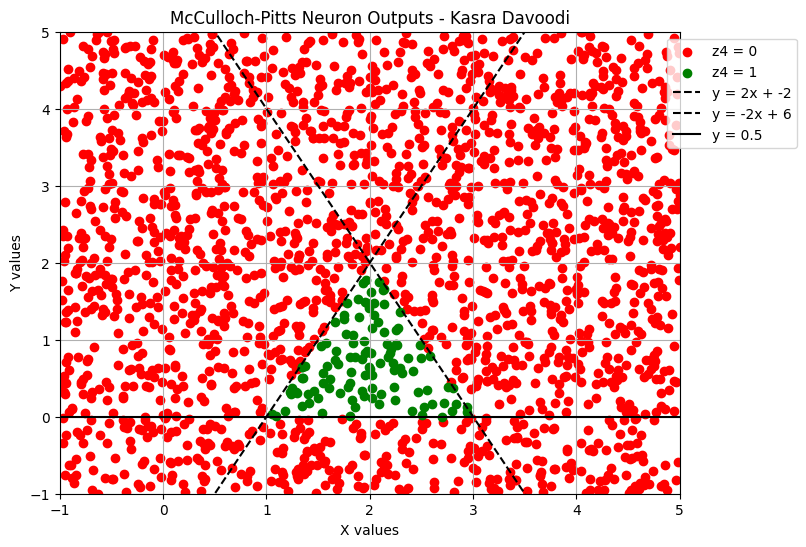

In [ ]:
# Generate random data points
num_points = 2000
x_values = np.random.uniform(-1, 5, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 5, num_points)  # Updated y-axis limits

# Initialize lists to store data points for different z5 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z4_value = DFA(x_values[i], y_values[i])
    if z4_value == [0]:  # z4 value is 0
        red_points.append((x_values[i], y_values[i]))
    else:  # z4 value is 1
        green_points.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs - Kasra Davoodi')

# Plotting lines with legends
slopes = [2, -2]
y_intercepts = [-2, 6]
x_line = np.linspace(-1, 5, 1000)  # x-axis range for lines
for slope, intercept in zip(slopes, y_intercepts):
    y_line = slope * x_line + intercept
    plt.plot(x_line, y_line,color='black', linestyle='--', label=f'y = {slope}x + {intercept}')

plt.axhline(y=0, color='black', linestyle='-', label='y = 0.5')

plt.grid(True)

# Set axis limits
plt.xlim(-1, 5)
plt.ylim(-1, 5)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Save plot as PDF
plt.savefig('c.png', bbox_inches='tight')

plt.show()

#ًQuestion 2

In [ ]:
gdown.download("https://drive.google.com/uc?id=1mjJkPjzJFZ8YGe5D5EgwG0GOmBDGmZ4f",
               "teleCust1000t.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1mjJkPjzJFZ8YGe5D5EgwG0GOmBDGmZ4f
To: /content/teleCust1000t.csv
100%|██████████| 37.0k/37.0k [00:00<00:00, 48.2MB/s]


'teleCust1000t.csv'

In [ ]:
file_path = "/content/teleCust1000t.csv"
df = pd.read_csv(file_path)

In [ ]:
seed = 73
np.random.seed(seed)
tf.random.set_seed(seed)

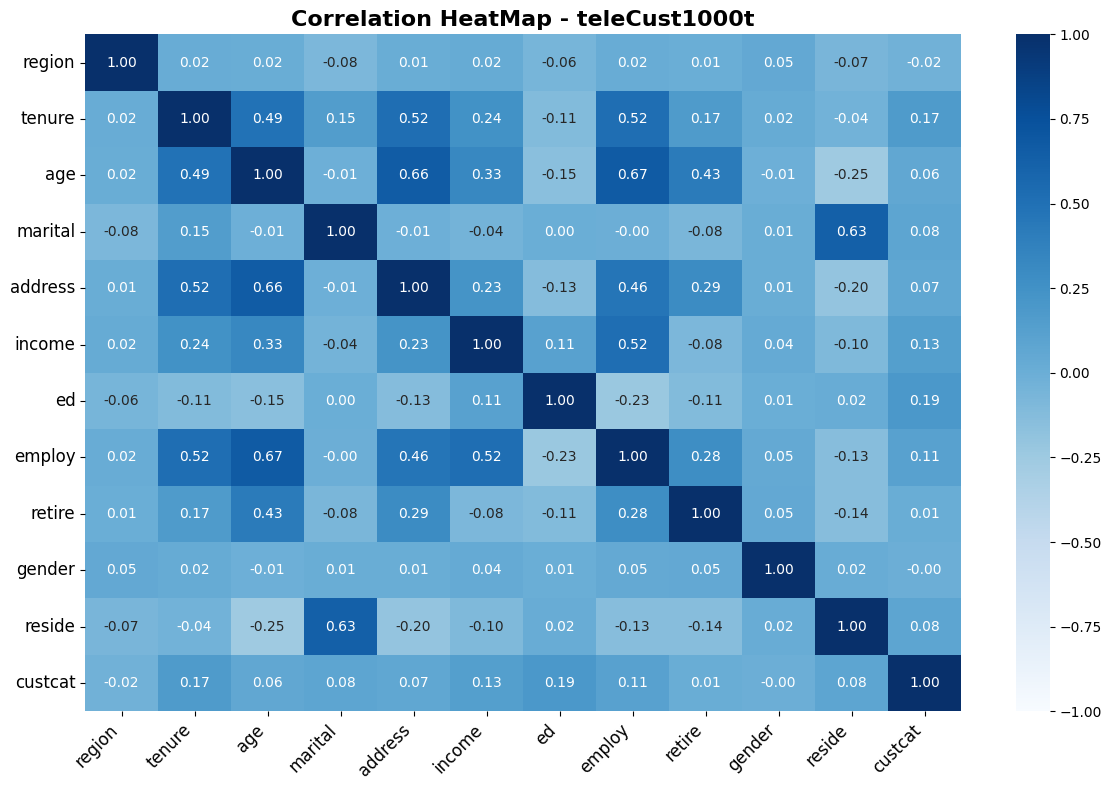

In [ ]:
# Calculate the correlation matrix
correlation = df[["region", "tenure", "age", "marital", "address", "income", "ed", "employ", "retire", "gender", "reside", "custcat"]].corr()

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Create the heatmap with better formatting
sns.heatmap(
    correlation,
    annot=True,
    cmap="Blues",
    vmin=-1,
    vmax=1,
    annot_kws={"size": 10},  # Adjust annotation font size
    fmt=".2f"  # Display correlation values with 2 decimal places
)

# Set the title with larger font size
plt.title("Correlation HeatMap - teleCust1000t", fontsize=16, weight='bold')

# Customize the axis tick font sizes
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Automatically adjust the layout for better appearance
plt.show()


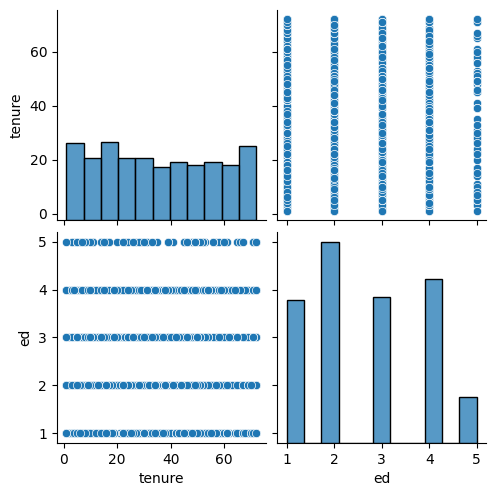

In [ ]:
subset = df[["tenure", "ed"]]
sns.pairplot(subset)
plt.show()

## One-Hot Encoding

In [ ]:
binary_features = ['marital', 'retire', 'gender','ed']
df_encoded = pd.get_dummies(df, columns=binary_features, drop_first=False, prefix_sep='_')

# Ensure 'custcat' is the last column
columns = [col for col in df_encoded.columns if col != 'custcat'] + ['custcat']
df_encoded = df_encoded[columns]

# Display the first few rows of the updated dataset
print(df_encoded.head())


   region  tenure  age  address  income  employ  reside  marital_0  marital_1  \
0       2      13   44        9    64.0       5       2      False       True   
1       3      11   33        7   136.0       5       6      False       True   
2       3      68   52       24   116.0      29       2      False       True   
3       2      33   33       12    33.0       0       1       True      False   
4       2      23   30        9    30.0       2       4      False       True   

   retire_0.0  retire_1.0  gender_0  gender_1   ed_1   ed_2   ed_3   ed_4  \
0        True       False      True     False  False  False  False   True   
1        True       False      True     False  False  False  False  False   
2        True       False     False      True   True  False  False  False   
3        True       False     False      True  False   True  False  False   
4        True       False      True     False   True  False  False  False   

    ed_5  custcat  
0  False        1  
1   True  

## Normalize

In [ ]:
scaler = MinMaxScaler()

# Exclude the target column 'custcat' from normalization
features = [col for col in df_encoded.columns if col != 'custcat']
df_encoded[features] = scaler.fit_transform(df_encoded[features])
print(df_encoded.head())


   region    tenure       age   address    income    employ    reside  \
0     0.5  0.169014  0.440678  0.163636  0.033153  0.106383  0.142857   
1     1.0  0.140845  0.254237  0.127273  0.076552  0.106383  0.714286   
2     1.0  0.943662  0.576271  0.436364  0.064497  0.617021  0.142857   
3     0.5  0.450704  0.254237  0.218182  0.014467  0.000000  0.000000   
4     0.5  0.309859  0.203390  0.163636  0.012658  0.042553  0.428571   

   marital_0  marital_1  retire_0.0  retire_1.0  gender_0  gender_1  ed_1  \
0        0.0        1.0         1.0         0.0       1.0       0.0   0.0   
1        0.0        1.0         1.0         0.0       1.0       0.0   0.0   
2        0.0        1.0         1.0         0.0       0.0       1.0   1.0   
3        1.0        0.0         1.0         0.0       0.0       1.0   0.0   
4        0.0        1.0         1.0         0.0       1.0       0.0   1.0   

   ed_2  ed_3  ed_4  ed_5  custcat  
0   0.0   0.0   1.0   0.0        1  
1   0.0   0.0   0.0   1.

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, precision_recall_fscore_support
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD

In [ ]:
X = df_encoded.drop('custcat', axis=1) # data
y = df_encoded['custcat'] # label

y = to_categorical(y - 1) # make the target data ready for one-hot encoding format of keras

# train & (test + val)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=73)

# val & test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=73)


## MLP design

### Model(one hidden layer)

In [ ]:
neurons=32
model = Sequential([
    Dense(neurons, input_dim=X.shape[1]),  # First Dense layer with L2
    Activation('relu'),  # Activation function
    Dense(y.shape[1], activation='softmax')  # Output layer
])

model.compile(optimizer="ADAM", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1) # Train
loss, accuracy = model.evaluate(X_val, y_val, verbose=0) # validation
y_pred = model.evaluate(X_test, y_test)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2873 - loss: 1.3989 - val_accuracy: 0.2667 - val_loss: 1.3917
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2919 - loss: 1.3725 - val_accuracy: 0.2867 - val_loss: 1.3724
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3113 - loss: 1.3561 - val_accuracy: 0.3000 - val_loss: 1.3570
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3277 - loss: 1.3423 - val_accuracy: 0.3200 - val_loss: 1.3433
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3465 - loss: 1.3298 - val_accuracy: 0.3400 - val_loss: 1.3297
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3558 - loss: 1.3178 - val_accuracy: 0.3333 - val_loss: 1.3168
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3779 - loss: 1.3067 - val_accuracy: 0.3533 - val_loss: 1.3049
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3944 - loss: 1.2968 - val_accuracy: 0.3867 - 

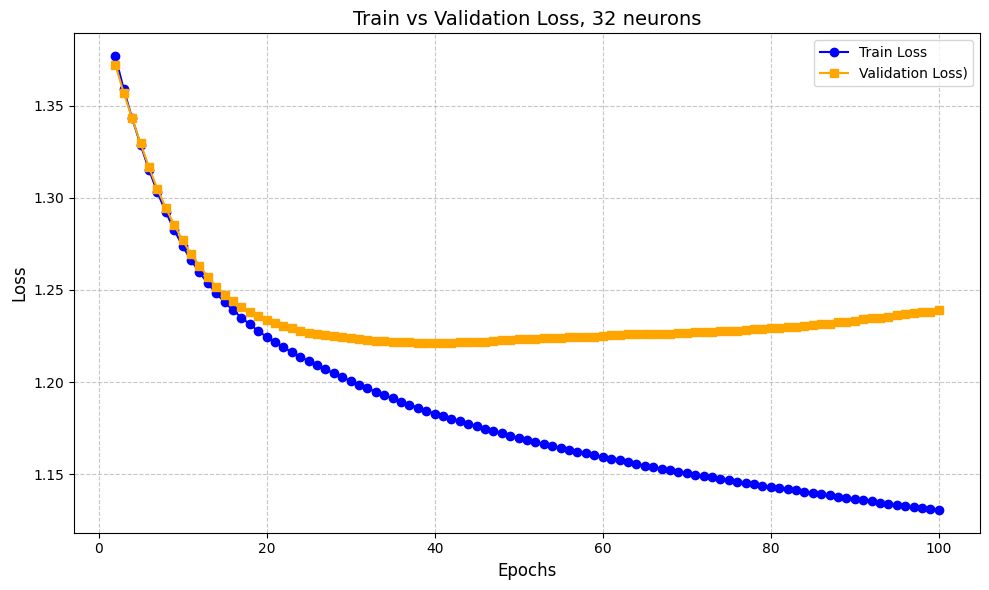

In [ ]:
full_train_loss = history.history['loss']
full_val_loss = history.history['val_loss']

# Extract loss values excluding the first epoch
train_loss_excluded = history.history['loss'][1:]
val_loss_excluded = history.history['val_loss'][1:]
epochs_excluded = range(2, len(train_loss_excluded) + 2)  # Adjust epochs after excluding the first epoch

# Create a figure and a subplot for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot loss excluding the first epoch
ax.plot(epochs_excluded, train_loss_excluded, label='Train Loss', marker='o', color='blue')
ax.plot(epochs_excluded, val_loss_excluded, label='Validation Loss)', marker='s', color='orange')

# Set titles, labels, legend, and grid
ax.set_title(f'Train vs Validation Loss, {neurons} neurons', fontsize=14)
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


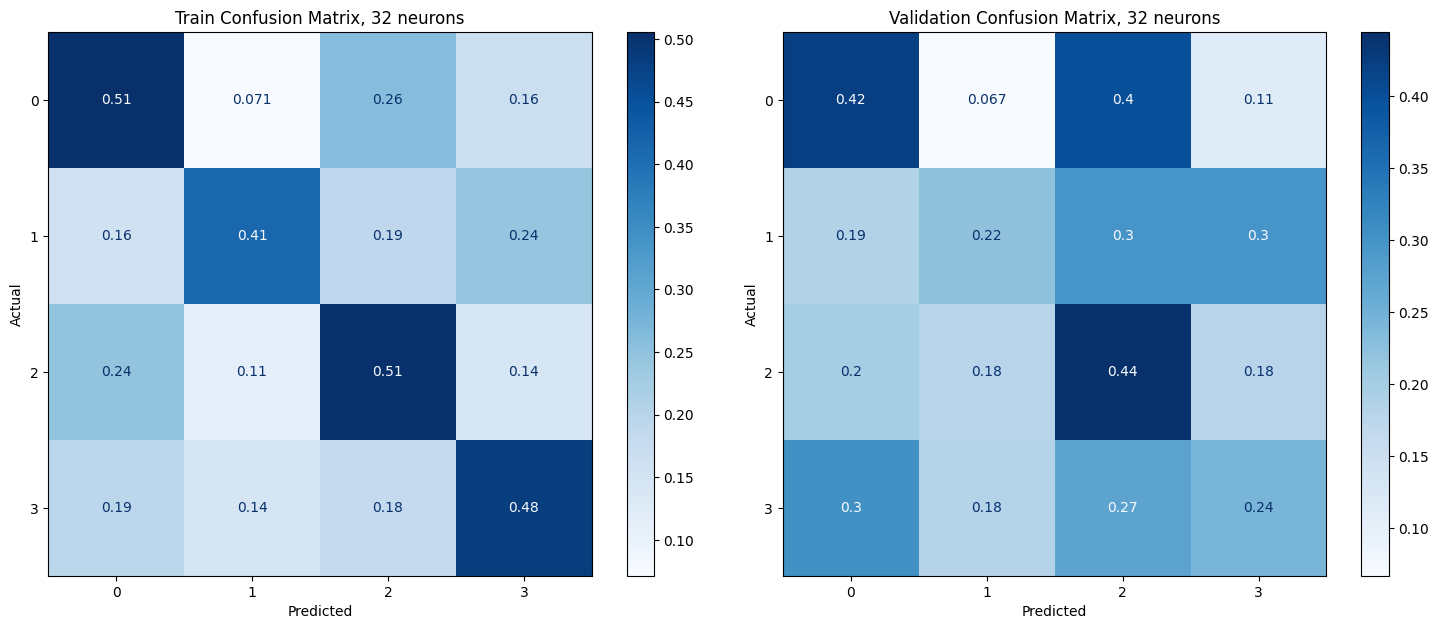

In [ ]:
train_preds = np.argmax(model.predict(X_train), axis=1)
test_preds = np.argmax(model.predict(X_test), axis=1)
val_preds = np.argmax(model.predict(X_val), axis=1)

# Convert true labels from one-hot encoding to class indices
train_true = np.argmax(y_train, axis=1)
test_true = np.argmax(y_test, axis=1)
val_true = np.argmax(y_val, axis=1)

# Create confusion matrices
train_cm = confusion_matrix(train_true, train_preds, normalize= 'true')
test_cm = confusion_matrix(test_true, test_preds, normalize='true')
val_cm = confusion_matrix(val_true, val_preds, normalize='true')

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Train Confusion Matrix
ConfusionMatrixDisplay(train_cm).plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f"Train Confusion Matrix, {neurons} neurons")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Validation Confusion Matrix
ConfusionMatrixDisplay(val_cm).plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f"Validation Confusion Matrix, {neurons} neurons")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Test Confusion Matrix
# ConfusionMatrixDisplay(test_cm).plot(ax=axes[2], cmap='Blues')
# axes[2].set_title("Test Confusion Matrix")
# axes[2].set_xlabel("Predicted")
# axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


### Model with two hidden layers

In [ ]:
neurons = [32,16]
model2 = Sequential([
    Dense(neurons[0], input_dim=X.shape[1]),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    Dense(neurons[1]),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')
])
optimizer = SGD(learning_rate=0.01)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['Recall'])
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1) # Train
loss, accuracy = model2.evaluate(X_val, y_val, verbose=0) # validation
y_pred = model2.evaluate(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - Recall: 0.1196 - loss: 1.9388 - val_Recall: 0.0000e+00 - val_loss: 1.4225
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Recall: 0.1104 - loss: 1.8051 - val_Recall: 0.0000e+00 - val_loss: 1.4097
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Recall: 0.1033 - loss: 1.7888 - val_Recall: 0.0000e+00 - val_loss: 1.3991
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Recall: 0.1006 - loss: 1.7462 - val_Recall: 0.0000e+00 - val_loss: 1.3877
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Recall: 0.1320 - loss: 1.5797 - val_Recall: 0.0000e+00 - val_loss: 1.3758
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.0759 - loss: 1.6459 - val_Recall: 0.0000e+00 - val_loss: 1.3710
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.0690 - loss: 1.5457 - val_Recall: 0.0000e+00 - val_loss: 1.3660
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.0956 - loss: 1.5205 - val_Recall: 0.0000e+00 -

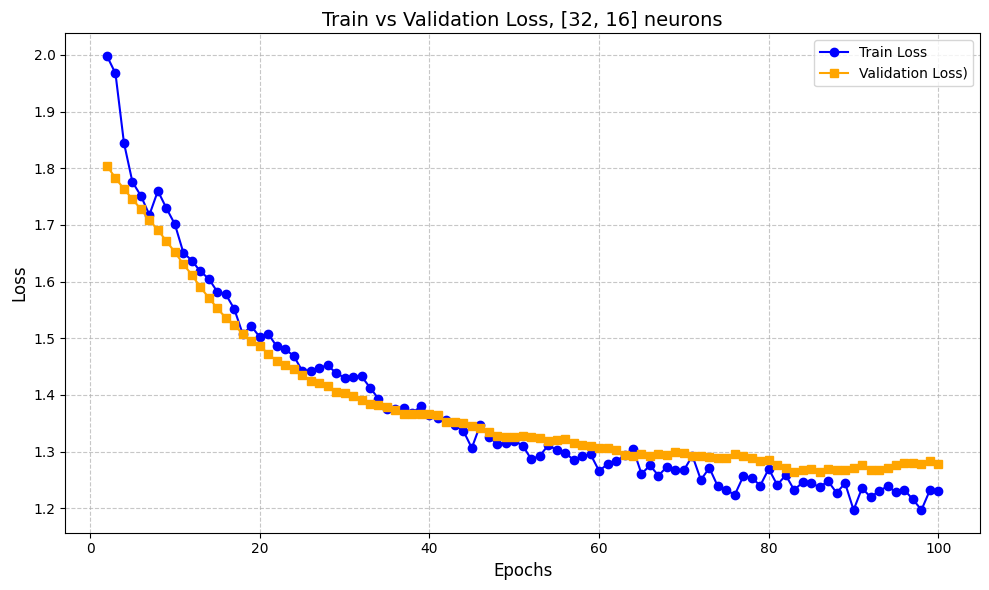

In [ ]:
full_train_loss = history.history['loss']
full_val_loss = history.history['val_loss']

# Extract loss values excluding the first epoch
train_loss_excluded = history.history['loss'][1:]
val_loss_excluded = history.history['val_loss'][1:]
epochs_excluded = range(2, len(train_loss_excluded) + 2)  # Adjust epochs after excluding the first epoch

# Create a figure and a subplot for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot loss excluding the first epoch
ax.plot(epochs_excluded, train_loss_excluded, label='Train Loss', marker='o', color='blue')
ax.plot(epochs_excluded, val_loss_excluded, label='Validation Loss)', marker='s', color='orange')

# Set titles, labels, legend, and grid
ax.set_title(f'Train vs Validation Loss, {neurons} neurons', fontsize=14)
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


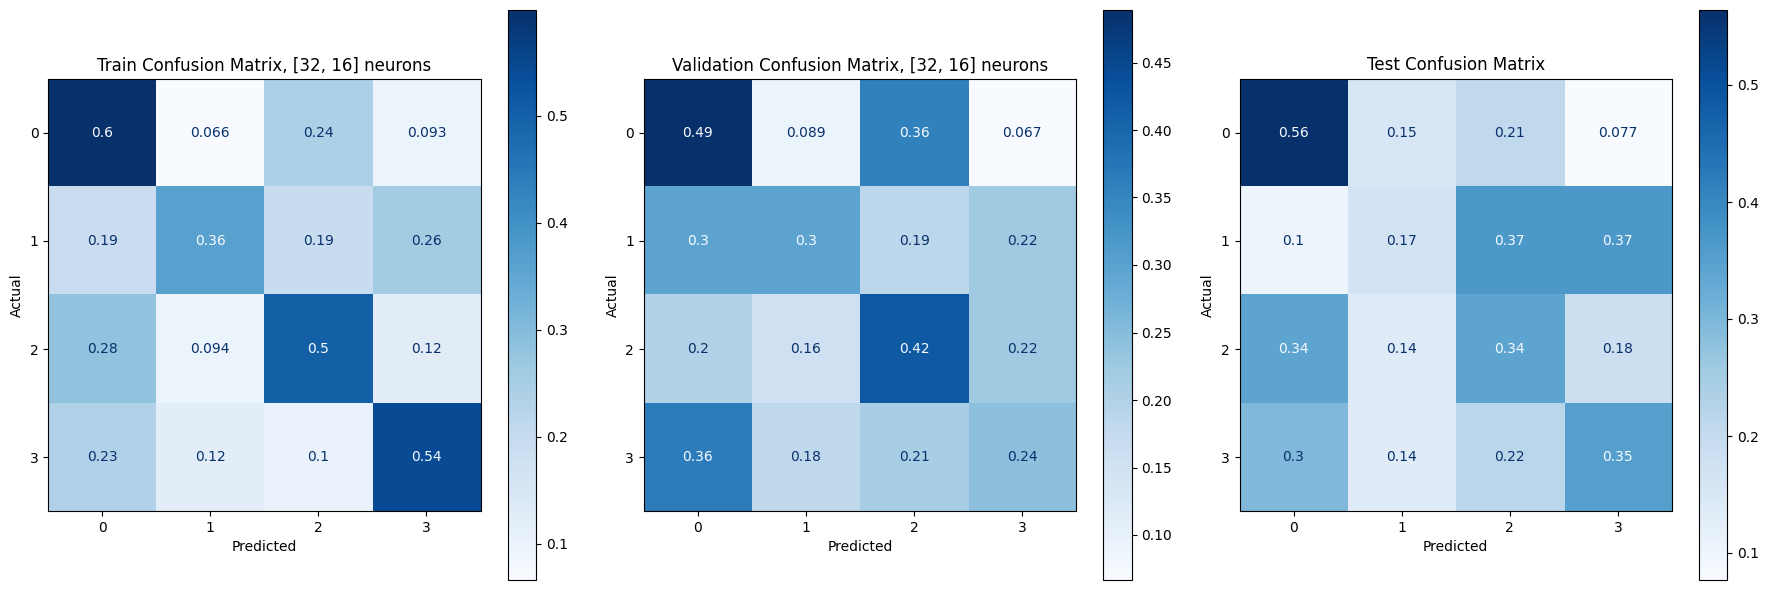

In [ ]:
train_preds = np.argmax(model2.predict(X_train), axis=1)
test_preds = np.argmax(model2.predict(X_test), axis=1)
val_preds = np.argmax(model2.predict(X_val), axis=1)

# Convert true labels from one-hot encoding to class indices
train_true = np.argmax(y_train, axis=1)
test_true = np.argmax(y_test, axis=1)
val_true = np.argmax(y_val, axis=1)

# Create confusion matrices
train_cm = confusion_matrix(train_true, train_preds, normalize= 'true')
test_cm = confusion_matrix(test_true, test_preds, normalize='true')
val_cm = confusion_matrix(val_true, val_preds, normalize='true')

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


# Train Confusion Matrix
ConfusionMatrixDisplay(train_cm).plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f"Train Confusion Matrix, {neurons} neurons")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Validation Confusion Matrix
ConfusionMatrixDisplay(val_cm).plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f"Validation Confusion Matrix, {neurons} neurons")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Test Confusion Matrix
# ConfusionMatrixDisplay(test_cm).plot(ax=axes[2], cmap='Blues')
# axes[2].set_title("Test Confusion Matrix")
# axes[2].set_xlabel("Predicted")
# axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


#Question 3


In [4]:
!pip install --upgrade --no-cache-dir gdown
!mikdir -p /content/rawdata
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip -d /content/rawdata

/bin/bash: line 1: mikdir: command not found
Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 23.3MB/s]
Archive:  PersianData.zip
  inflating: /content/rawdata/1.jpg  
  inflating: /content/rawdata/2.jpg  
  inflating: /content/rawdata/3.jpg  
  inflating: /content/rawdata/4.jpg  
  inflating: /content/rawdata/5.jpg  


In [39]:
import cv2

def printImageAsBinaryGrid(path, threshold=100):

    # 1. Read the image in grayscale
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Could not open or find the image: {path}")

   # 2. Get the dimensions
    height, width = image.shape

    # 3. Create a single list to hold every pixel
    all_pixels = []

    # 4. Loop over each pixel
    for y in range(height):
        # Build a string for printing purposes
        row_string = []
        for x in range(width):
            # If the pixel's intensity is above threshold -> -1, else 1
            if image[y, x] > threshold:
                row_string.append("-1")
                all_pixels.append(-1)
            else:
                row_string.append(" 1")
                all_pixels.append(1)

        # Print the row with spaces (or not) to visualize in the console
        #print(" ".join(row_string))

    all_pixels_2d = np.array(all_pixels).reshape(-1, 1)
    return all_pixels_2d

#temp = printImageAsBinaryGrid("/content/rawdata/5.jpg", threshold=100)
temp = printImageAsBinaryGrid("/content/noise(50)/noisy1.jpg", threshold=100)



## Noise

In [150]:
import os
from PIL import Image, ImageDraw
import random
noise_factor = 20000
def generateNoisyImages():
    # Define the directory where noisy images will be saved

    noise_dir = f"/content/noise({noise_factor})"

    # Create the directory if it doesn't exist
    os.makedirs(noise_dir, exist_ok=True)
    print(f"Directory '{noise_dir}' is ready.")

    # List of image file paths
    image_paths = [
        "/content/rawdata/1.jpg",
        "/content/rawdata/2.jpg",
        "/content/rawdata/3.jpg",
        "/content/rawdata/4.jpg",
        "/content/rawdata/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        # Define the path for the noisy image
        noisy_image_path = os.path.join(noise_dir, f"noisy{i}.jpg")
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    try:
        # Open the input image.
        image = Image.open(input_path).convert("RGB")  # Ensure image is in RGB mode

        # Create a drawing tool for manipulating the image.
        draw = ImageDraw.Draw(image)

        # Determine the image's width and height in pixels.
        width, height = image.size

        # Load pixel values for the image.
        pix = image.load()

        # Define a factor for introducing noise.
          # Adjusted to a reasonable value

        # Loop through all pixels in the image.
        for i in range(width):
            for j in range(height):
                # Generate a random noise value within the specified factor.
                rand = random.randint(-noise_factor, noise_factor)

                # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
                red = pix[i, j][0] + rand
                green = pix[i, j][1] + rand
                blue = pix[i, j][2] + rand

                # Ensure that RGB values stay within the valid range (0-255).
                red = max(0, min(255, red))
                green = max(0, min(255, green))
                blue = max(0, min(255, blue))

                # Set the pixel color accordingly.
                draw.point((i, j), (red, green, blue))

        # Save the noisy image as a file.
        image.save(output_path, "JPEG")
        print(f"Saved noisy image to '{output_path}'")

    except FileNotFoundError:
        print(f"Input file '{input_path}' not found.")
    except Exception as e:
        print(f"An error occurred while processing '{input_path}': {e}")
    finally:
        # Clean up the drawing tool.
        del draw

# Generate noisy images and save them
generateNoisyImages()


Directory '/content/noise(20000)' is ready.
Saved noisy image to '/content/noise(20000)/noisy1.jpg'
Noisy image for /content/rawdata/1.jpg generated and saved as /content/noise(20000)/noisy1.jpg
Saved noisy image to '/content/noise(20000)/noisy2.jpg'
Noisy image for /content/rawdata/2.jpg generated and saved as /content/noise(20000)/noisy2.jpg
Saved noisy image to '/content/noise(20000)/noisy3.jpg'
Noisy image for /content/rawdata/3.jpg generated and saved as /content/noise(20000)/noisy3.jpg
Saved noisy image to '/content/noise(20000)/noisy4.jpg'
Noisy image for /content/rawdata/4.jpg generated and saved as /content/noise(20000)/noisy4.jpg
Saved noisy image to '/content/noise(20000)/noisy5.jpg'
Noisy image for /content/rawdata/5.jpg generated and saved as /content/noise(20000)/noisy5.jpg


## The HopField Network

In [242]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        for pattern in patterns:
            # Ensure the pattern is a column vector and in bipolar form
            pattern = np.where(pattern == 0, -1, pattern).reshape(-1, 1)
            # Hebbian learning rule: W = X * X^T - diag
            self.weights += np.dot(pattern, pattern.T)

        # Ensure no self-connections by zeroing the diagonal
        np.fill_diagonal(self.weights, 0)

    def predict(self, input_pattern, steps=100):
        if input_pattern.shape[0] != self.size:
            raise ValueError("Input pattern size does not match the network size.")

        # Ensure the input is in bipolar form
        output = np.where(input_pattern == 0, -1, input_pattern).copy()

        for _ in range(steps):
            prev_output = output.copy()
            for i in range(self.size):
                raw_value = np.dot(self.weights[i, :], output)
                output[i] = 1 if raw_value >= 0 else -1
            if np.array_equal(prev_output, output):  # Check for convergence
                break

        return output


In [244]:
def visualize_pattern(pattern, image_size=(96, 96)):

    if isinstance(pattern, list):
        pattern = np.array(pattern)

    # Check if the pattern length matches the expected image size
    expected_length = image_size[0] * image_size[1]
    if pattern.size != expected_length:
        raise ValueError(f"Pattern length {pattern.size} does not match expected size {expected_length} for {image_size} image.")

    # Reshape to 2D array
    image_array = pattern.reshape(image_size)

    # Map -1 to 0 and 1 to 255
    image_array = np.where(image_array == -1, 0, 255).astype(np.uint8)

    # Create an image using PIL
    img = Image.fromarray(image_array, 'L')  # 'L' mode for grayscale

    # Display the image using matplotlib
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')
    plt.title(' Pattern')
    plt.axis('off')
    plt.show()

    # Optionally, save the image
    # img.save('predicted_pattern.png')

In [289]:
# Load bipolar patterns from your function
pattern1 = printImageAsBinaryGrid("/content/rawdata/1.jpg", threshold=100)
pattern2 = printImageAsBinaryGrid("/content/rawdata/2.jpg", threshold=100)
pattern3 = printImageAsBinaryGrid("/content/rawdata/3.jpg", threshold=100)
pattern4 = printImageAsBinaryGrid("/content/rawdata/4.jpg", threshold=100)
pattern5 = printImageAsBinaryGrid("/content/rawdata/5.jpg", threshold=100)


# pattern1 = printImageAsBinaryGrid("/content/missingpoint(0.95)/1.jpg", threshold=100)
# pattern2 = printImageAsBinaryGrid("/content/missingpoint(0.95)/2.jpg", threshold=100)
# pattern3 = printImageAsBinaryGrid("/content/missingpoint(0.95)/3.jpg", threshold=100)
# pattern4 = printImageAsBinaryGrid("/content/missingpoint(0.95)/4.jpg", threshold=100)
# pattern5 = printImageAsBinaryGrid("/content/missingpoint(0.95)/5.jpg", threshold=100)


# Initialize the Hopfield Network with appropriate size
hopfield_net = HopfieldNetwork(size=pattern3.size)

# Train the network with patterns
hopfield_net.train([pattern3, pattern4])




In [293]:
# Prediction
pattern6 = printImageAsBinaryGrid("/content/noise(500)/noisy3.jpg", threshold=100).flatten()
predicted_pattern = hopfield_net.predict(pattern6)

Noisy Pattern Visualization:


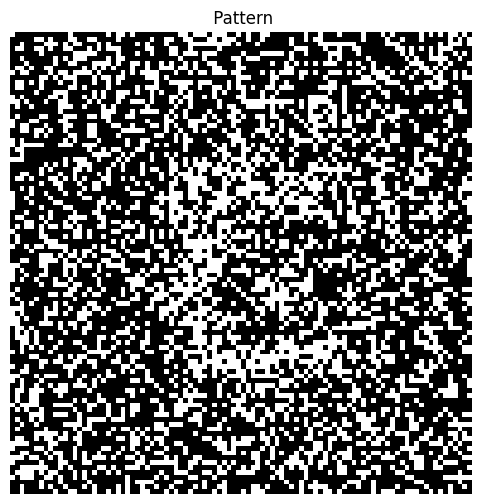

In [294]:
print("Noisy Pattern Visualization:")
visualize_pattern(pattern6)

Reconstructed Pattern Visualization:


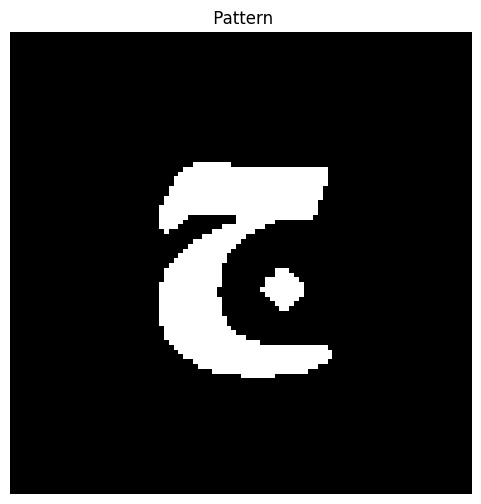

In [295]:
print("Reconstructed Pattern Visualization:")
visualize_pattern(predicted_pattern)

In [237]:
import os
import random
from PIL import Image

def process_images(input_folder, output_folder, missing_fraction=0.1):

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        if not filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            continue  # Skip non-image files

        output_path = os.path.join(output_folder, filename)
        try:
            with Image.open(input_path) as image:
                image = image.convert("L")  # Convert to grayscale
                pixels = image.load()

                width, height = image.size
                black_pixels = [(x, y) for x in range(width) for y in range(height) if pixels[x, y] < 100]  # Find black pixels

                if missing_fraction >= 1.0:
                    # Remove all black pixels
                    for x, y in black_pixels:
                        pixels[x, y] = 255  # Set to white
                else:
                    num_missing = int(missing_fraction * len(black_pixels))  # Number of black pixels to turn white
                    missing_pixels = random.sample(black_pixels, min(num_missing, len(black_pixels)))
                    for x, y in missing_pixels:
                        pixels[x, y] = 255  # Set to white

                image.save(output_path)
                print(f"Processed and saved: {output_path}")
        except Exception as e:
            print(f"Failed to process {input_path}: {e}")

input_folder = "/content/rawdata"
output_folder = "/content/missingpoint(0.1)"
process_images(input_folder, output_folder, missing_fraction=0.1)


input_folder = "/content/rawdata"
output_folder = "/content/missingpoint(0.3)"
process_images(input_folder, output_folder, missing_fraction=0.3)


input_folder = "/content/rawdata"
output_folder = "/content/missingpoint(0.5)"
process_images(input_folder, output_folder, missing_fraction=0.5)


input_folder = "/content/rawdata"
output_folder = "/content/missingpoint(0.7)"
process_images(input_folder, output_folder, missing_fraction=0.7)

Processed and saved: /content/missingpoint(0.1)/4.jpg
Processed and saved: /content/missingpoint(0.1)/3.jpg
Processed and saved: /content/missingpoint(0.1)/1.jpg
Processed and saved: /content/missingpoint(0.1)/5.jpg
Processed and saved: /content/missingpoint(0.1)/2.jpg
Processed and saved: /content/missingpoint(0.3)/4.jpg
Processed and saved: /content/missingpoint(0.3)/3.jpg
Processed and saved: /content/missingpoint(0.3)/1.jpg
Processed and saved: /content/missingpoint(0.3)/5.jpg
Processed and saved: /content/missingpoint(0.3)/2.jpg
Processed and saved: /content/missingpoint(0.5)/4.jpg
Processed and saved: /content/missingpoint(0.5)/3.jpg
Processed and saved: /content/missingpoint(0.5)/1.jpg
Processed and saved: /content/missingpoint(0.5)/5.jpg
Processed and saved: /content/missingpoint(0.5)/2.jpg
Processed and saved: /content/missingpoint(0.7)/4.jpg
Processed and saved: /content/missingpoint(0.7)/3.jpg
Processed and saved: /content/missingpoint(0.7)/1.jpg
Processed and saved: /conten

#Question 4

In [156]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [157]:
data = fetch_california_housing()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

## DENSE model:

In [179]:
Dmodel = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

Dmodel.compile(optimizer=Adam(), loss=MeanSquaredError())

In [175]:
Dhistory = Dmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1) # Train

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6501 - val_loss: 0.4402
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4043 - val_loss: 0.3760
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3586 - val_loss: 0.3622
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3403 - val_loss: 0.3569
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3343 - val_loss: 0.3362
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3178 - val_loss: 0.3384
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3139 - val_loss: 0.3373
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3035 - val_loss: 0.3256
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3403 - val_loss: 0.3563
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3191 - val_loss: 0.3134
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3016 - val_loss: 0.3166
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━

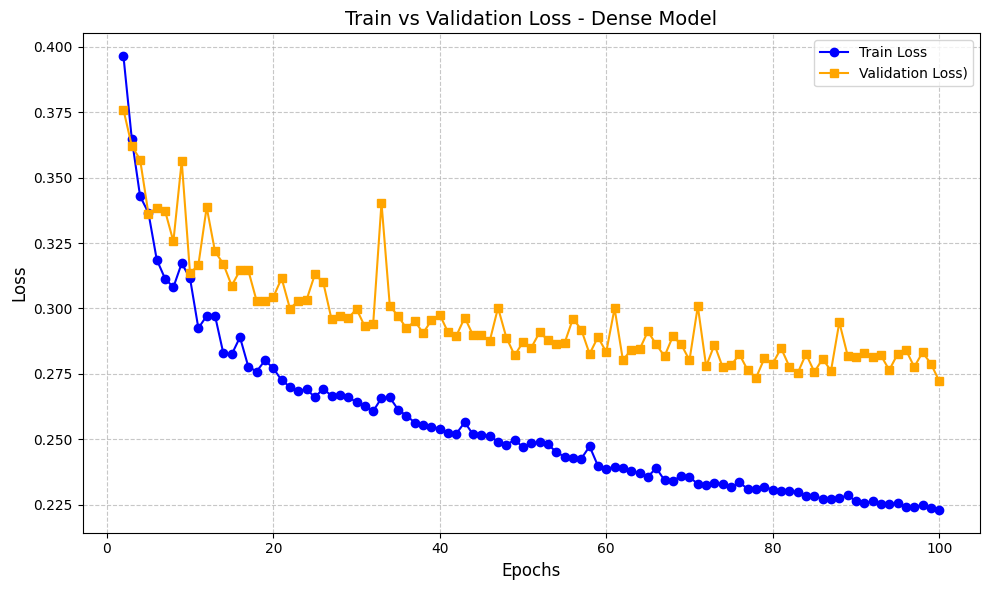

In [182]:
full_train_loss = Dhistory.history['loss']
full_val_loss = Dhistory.history['val_loss']

# Extract loss values excluding the first epoch
train_loss_excluded = Dhistory.history['loss'][1:]
val_loss_excluded = Dhistory.history['val_loss'][1:]
epochs_excluded = range(2, len(train_loss_excluded) + 2)  # Adjust epochs after excluding the first epoch

# Create a figure and a subplot for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot loss excluding the first epoch
ax.plot(epochs_excluded, train_loss_excluded, label='Train Loss', marker='o', color='blue')
ax.plot(epochs_excluded, val_loss_excluded, label='Validation Loss)', marker='s', color='orange')

# Set titles, labels, legend, and grid
ax.set_title(f'Train vs Validation Loss - Dense Model', fontsize=14)
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## RBF layer

In [196]:
from tensorflow.keras.models import Sequential
class RBFModel(tf.keras.layers.Layer):
    def __init__(self, units, gamma=0.5):
        super(RBFModel, self).__init__()
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='random_uniform',
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.units,),
                                     initializer=tf.keras.initializers.Constant(1.0),
                                     trainable=True)

    def call(self, inputs):
        C = tf.expand_dims(self.centers, axis=0)
        X = tf.expand_dims(inputs, axis=1)
        distances = tf.reduce_sum((X - C) ** 2, axis=-1)
        return tf.exp(-self.gamma * distances)

# Create the model
RBFmodel = Sequential([
    Input(shape=(X.shape[1],)),
    RBFModel(units=20, gamma=1),
    Dense(1)
])

RBFmodel.compile(optimizer=Adam(), loss=MeanSquaredError())

In [197]:
RBFhistory = RBFmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1) # Train


Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.6790 - val_loss: 3.2391
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.8958 - val_loss: 2.2569
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0447 - val_loss: 1.6351
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4812 - val_loss: 1.2968
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2274 - val_loss: 1.1110
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0140 - val_loss: 1.0040
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9677 - val_loss: 0.9374
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8945 - val_loss: 0.8875
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8463 - val_loss: 0.8434
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7829 - val_loss: 0.8047
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7431 - val_loss: 0.7749
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━

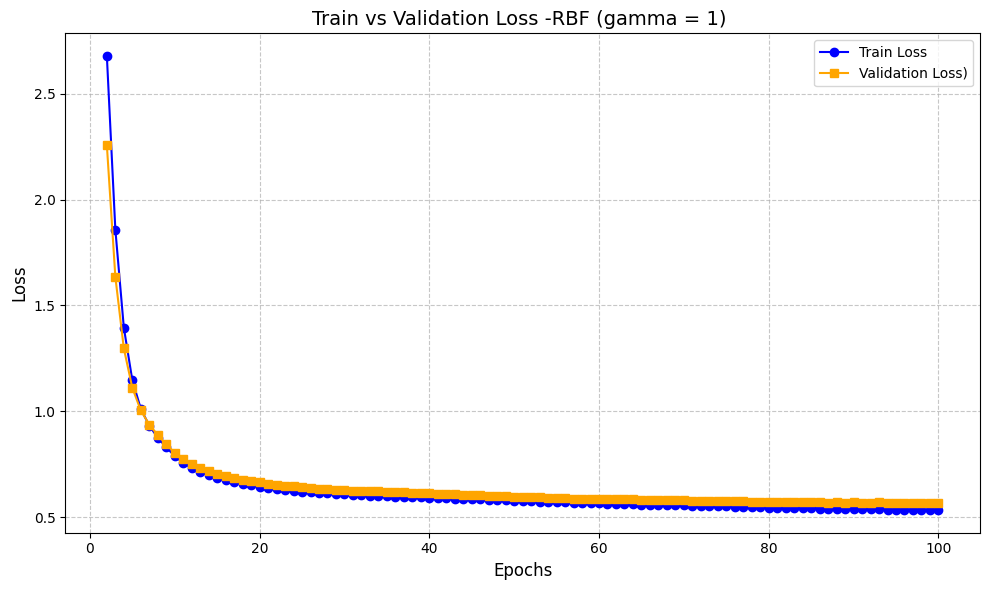

In [198]:
full_train_loss = RBFhistory.history['loss']
full_val_loss = RBFhistory.history['val_loss']

# Extract loss values excluding the first epoch
train_loss_excluded = RBFhistory.history['loss'][1:]
val_loss_excluded = RBFhistory.history['val_loss'][1:]
epochs_excluded = range(2, len(train_loss_excluded) + 2)  # Adjust epochs after excluding the first epoch

# Create a figure and a subplot for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot loss excluding the first epoch
ax.plot(epochs_excluded, train_loss_excluded, label='Train Loss', marker='o', color='blue')
ax.plot(epochs_excluded, val_loss_excluded, label='Validation Loss)', marker='s', color='orange')

# Set titles, labels, legend, and grid
ax.set_title(f'Train vs Validation Loss -RBF (gamma = 1) ', fontsize=14)
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()